# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)


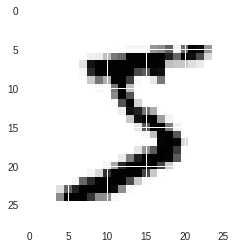

In [0]:
print (X_train.shape)
print(X_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation

In [0]:

def my_model():
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # output 26x26x32
  model.add(Convolution2D(32, 1, 1, activation='relu')) # output 26x26x32
  model.add(Convolution2D(32, 3, 3, activation='relu')) # output 24x24x32
  #model.add(Convolution2D(64, 3, 3, activation='relu')) #output 24x24x64
  
  model.add(MaxPooling2D((2,2)))  # output 12x12x32
  
  #model.add(Convolution2D(10, 1, activation='relu'))
  
  model.add(Convolution2D(10, 12))
  model.add(Flatten())
  model.add(Activation('softmax'))
  
  return model

def old_model():
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
  model.add(Convolution2D(10, 1, activation='relu'))
  model.add(Convolution2D(10, 26))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
'''
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_76 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 24, 24, 32)        1056      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 10, 10, 16)        528       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4010      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
=================================================================
Total params: 15,674
Trainable params: 15,674
Non-trainable params: 0

Accuracy: 0.9895
'''
                  
            
def my_model2():
  model = Sequential()
  model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1))) # output 24x24x32
  model.add(Convolution2D(32, 1, 1, activation='relu')) # output: 24x24x32
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(Convolution2D(32, 3,3, activation='relu')) #out: 10x10x32
  model.add(Convolution2D(16,1,1, activation='relu'))
  model.add(MaxPooling2D(2)) # out : 5x5x2
  model.add(Flatten())
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  
  return model

In [0]:
'''
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_107 (Conv2D)          (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 24, 24, 32)        2080      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 10, 10, 16)        4624      
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 10, 10, 16)        272       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 3, 3, 32)          4640      
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 1, 1, 16)          4624      
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 1, 1, 10)          170       
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
=================================================================
Total params: 18,074
Trainable params: 18,074
Non-trainable params: 0
________________________________________
'''
def my_model2_ext():
  model = Sequential()
  model.add(Convolution2D(64, 5, 5, activation='relu', input_shape=(28,28,1))) # output 24x24x32
  model.add(Convolution2D(32, 1, 1, activation='relu')) # output: 24x24x32
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(Convolution2D(16, 3,3, activation='relu')) #out: 10x10x32
  model.add(Convolution2D(16,1,1, activation='relu'))
  model.add(MaxPooling2D(2)) # out : 5x5x2
  
  model.add(Convolution2D(32,3,3,activation='relu'))
  model.add(Convolution2D(16,3,3,activation='relu'))
  model.add(Convolution2D(10,1,1,activation='relu'))
  
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
# Replace Dense -> Conv
'''

Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_29 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 1, 1, 16)          6416      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 1, 10)          170       
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
=================================================================
Total params: 12,042
Trainable params: 12,042
Non-trainable params: 0
______________________________

Accuracy: 0.9853
'''

def my_model3():
  
  model = Sequential()
  model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1))) # output 24x24x32
  #model.add(Convolution2D(32, 1, 1, activation='relu')) # output: 24x24x32
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(Convolution2D(16, 3,3, activation='relu')) #out: 10x10x32
  #model.add(Convolution2D(16,1,1, activation='relu'))
  model.add(MaxPooling2D(2)) # out : 5x5x2
  
  model.add(Convolution2D(24,5,5,activation='relu'))
  
  model.add(Convolution2D(16,1,1,activation='relu'))
  model.add(Convolution2D(10,1,1,activation='relu'))
  
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model


In [0]:
def my_model4():
  model = Sequential()
  model.add(Convolution2D(16, 5, 5, activation='relu', input_shape=(28,28,1))) # output 24x24x32
  model.add(Convolution2D(32, 1, 1, activation='relu')) # output: 24x24x32
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(Convolution2D(16, 3,3, activation='relu')) #out: 10x10x32
  model.add(Convolution2D(32,1,1, activation='relu'))
  model.add(MaxPooling2D(2)) # out : 5x5x2
  
  model.add(Convolution2D(32, 3,3, activation='relu'))
  model.add(Convolution2D(32, 1, 1, activation='relu'))
  #model.add(Flatten())
  #model.add(Dense(10))
  model.add(Convolution2D(10,3,3, activation='relu'))
  model.add(Flatten())
  model.add(Activation('softmax'))
  
  
  return model

In [0]:
'''
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_56 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 22, 22, 24)        3480      
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 20, 20, 32)        6944      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 10, 10, 10)        330       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 1, 1, 16)          4016      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 1, 1, 10)          170       
_________________________________________________________________
flatten_9 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
=================================================================
Total params: 16,188
Trainable params: 16,188
Non-trainable params: 0
_________________________________________________________________

Accuracy: 0.9849
'''
# conv -> conv -> conv -> conv -> max pool -> conv 1x1 -> softmax

def my_model5():
  model = Sequential()
  model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
  model.add(Convolution2D(16, 3, 3, activation='relu'))
  model.add(Convolution2D(24, 3, 3, activation='relu'))
  model.add(Convolution2D(32, 3, 3, activation='relu'))
  model.add(MaxPooling2D(2))
  model.add(Convolution2D(10, 1, 1, activation='relu'))
  model.add(MaxPooling2D((2)))
  model.add(Convolution2D(16, 5, 5, activation='relu'))
  #model.add(Convolution2D(10, 3, 3, activation='relu'))
  model.add(Convolution2D(10, 1, 1, activation='relu'))
  model.add(Flatten())
  model.add(Activation('softmax'))
  
  return model

In [0]:
def my_model6():
  model = Sequential()
  model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
  model.add(Convolution2D(32, 3, 3, activation='relu'))
  #model.add(Convolution2D(24, 3, 3, activation='relu'))  #out 22
  
  model.add(MaxPooling2D((2)))
  model.add(Convolution2D(16, 3, 3, activation='relu')) # 9x9
  model.add(Convolution2D(32, 3, 3, activation='relu')) # 7x7
  #model.add(Convolution2D(24, 3, 3, activation='relu')) # 5x5
  
  model.add(MaxPooling2D(2))                            #  9x9
  model.add(Convolution2D(16, 3, 3, activation='relu'))  #  7x7
  #model.add(Convolution2D(16, 3, 3, activation='relu')) # 5x5
  #model.add(MaxPooling2D((2)))
  model.add(Convolution2D(10, 3, 3, activation='relu'))
   
 #model.add(Convolution2D(10, 1, 1, activation='relu'))
  model.add(Flatten())
  model.add(Activation('softmax'))
  
  return model

In [0]:
from keras.layers import SeparableConv2D, SeparableConvolution2D
from keras.layers import BatchNormalization

In [0]:
## Use Depthwise Separable Convolution

def my_model_use_sepConv():
  model = Sequential()
  
  model.add(SeparableConvolution2D(40, (3,3), activation='relu', input_shape=(28,28,1))) # output 24x24
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(80, (3,3), activation='relu'))  # 24
  model.add(BatchNormalization())
  #model.add(Convolution2D(32, 1, 1, activation='relu')) # output: 24x24x32
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(SeparableConvolution2D(64, (3,3), activation='relu')) #out: 10x10x32
  model.add(BatchNormalization())
  #model.add(Convolution2D(16, 1,1, activation='relu')) 
  #model.add(Convolution2D(10, 3,3, activation='relu'))  #out 6
  model.add(MaxPooling2D(2)) # out : 5x5
  
  model.add(SeparableConvolution2D(80,(3,3),activation='relu')) # 3x3
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(10,(3,3),activation='relu'))
  #model.add(BatchNormalization())
  
  #model.add(Convolution2D(10,1,1,activation='relu'))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
## Use Depthwise Separable Convolution

'''
Layer (type)                 Output Shape              Param #   
=================================================================
separable_conv2d_76 (Separab (None, 26, 26, 32)        73        
_________________________________________________________________
batch_normalization_54 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
separable_conv2d_77 (Separab (None, 24, 24, 64)        2400      
_________________________________________________________________
batch_normalization_55 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
separable_conv2d_78 (Separab (None, 24, 24, 64)        4224      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
separable_conv2d_79 (Separab (None, 10, 10, 64)        4736      
_________________________________________________________________
batch_normalization_56 (Batc (None, 10, 10, 64)        256       
_________________________________________________________________
separable_conv2d_80 (Separab (None, 10, 10, 16)        1104      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
separable_conv2d_81 (Separab (None, 3, 3, 64)          1232      
_________________________________________________________________
batch_normalization_57 (Batc (None, 3, 3, 64)          256       
_________________________________________________________________
separable_conv2d_82 (Separab (None, 1, 1, 10)          1226      
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
=================================================================
Total params: 15,891
Trainable params: 15,443
Non-trainable params: 448
_________________________________
Accuracy: 0.9898
'''
def my_model_use_sepConv2():
  model = Sequential()
  
  model.add(SeparableConvolution2D(32, (3,3), activation='relu', input_shape=(28,28,1))) # output 24x24
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(64, (3,3), activation='relu'))  # 24
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(64, (1,1), activation='relu')) # output: 24x24x32
  
  model.add(MaxPooling2D((2,2))) # out 12x12x32
  
  model.add(SeparableConvolution2D(64, (3,3), activation='relu')) #out: 10x10x32
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(16, (1,1), activation='relu')) 
  #model.add(Convolution2D(10, 3,3, activation='relu'))  #out 6
  model.add(MaxPooling2D(2)) # out : 5x5
  
  model.add(SeparableConvolution2D(64,(3,3),activation='relu')) # 3x3
  model.add(BatchNormalization())
  model.add(SeparableConvolution2D(10,(3,3),activation='relu'))
  #model.add(BatchNormalization())
  
  #model.add(Convolution2D(10,1,1,activation='relu'))
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
from keras.layers import Activation
#model = my_model2()

#model = my_model2_ext()  #0.9873, 15K params, 0.9898 18074 params

#model = my_model2_ext2()

#model = my_model3()

#model = my_model4()

#model = my_model5()  #0.9849
#model = my_model6()  # 0.904

# Use Depthwise Separable Conv
model = my_model_use_sepConv() #0.9901, 17.5K params

#model = my_model_use_sepConv2()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_83 (Separab (None, 26, 26, 40)        89        
_________________________________________________________________
batch_normalization_58 (Batc (None, 26, 26, 40)        160       
_________________________________________________________________
separable_conv2d_84 (Separab (None, 24, 24, 80)        3640      
_________________________________________________________________
batch_normalization_59 (Batc (None, 24, 24, 80)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 80)        0         
_________________________________________________________________
separable_conv2d_85 (Separab (None, 10, 10, 64)        5904      
_________________________________________________________________
batch_normalization_60 (Batc (None, 10, 10, 64)        256       
__________

In [0]:
from keras.optimizers import adam

In [0]:
opt=adam()
#opt= adam(lr=0.0005)

In [0]:

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0936 - acc: 0.9719
Epoch 2/10
60000/60000 [==============================] - 37s 614us/step - loss: 0.0384 - acc: 0.9880
Epoch 3/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0291 - acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.0241 - acc: 0.9924
Epoch 5/10
60000/60000 [==============================] - 37s 617us/step - loss: 0.0209 - acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.0182 - acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 38s 627us/step - loss: 0.0165 - acc: 0.9946
Epoch 8/10
60000/60000 [==============================] - 37s 617us/step - loss: 0.0150 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 37s 625us/step - loss: 0.0130 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 38s 625us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.034350919584484385, 0.9901]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[3.86349841e-09 2.78612999e-09 1.24484678e-09 1.21608466e-08
  5.33140698e-10 5.33140698e-10 5.33140698e-10 1.00000000e+00
  5.89803206e-10 4.29378977e-09]
 [3.16156488e-08 2.88213169e-08 9.99999642e-01 2.88213169e-08
  2.88213169e-08 2.88213169e-08 2.88213169e-08 2.88213169e-08
  2.88213169e-08 3.53467087e-08]
 [1.78533469e-07 9.99996781e-01 1.50335680e-07 1.50335680e-07
  1.50335680e-07 1.96407626e-07 3.05039606e-07 1.68747090e-06
  1.64927940e-07 1.50335680e-07]
 [9.99999285e-01 1.07639536e-10 4.00946210e-09 1.07639536e-10
  1.07639536e-10 1.07639536e-10 6.65784171e-07 1.07639536e-10
  1.07639536e-10 1.34675882e-10]
 [7.62901686e-11 7.62901686e-11 7.62901686e-11 7.62901686e-11
  9.99999404e-01 7.62901686e-11 7.62901686e-11 7.62901686e-11
  7.62901686e-11 5.93362586e-07]
 [1.59244760e-08 9.99999523e-01 7.79247511e-09 7.79247511e-09
  1.15024150e-08 7.79247511e-09 7.79247511e-09 5.08128096e-07
  1.80807618e-08 7.79247511e-09]
 [4.79024487e-10 4.79024487e-10 4.79024487e-10 4.79024487e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored